In [29]:
import pandas as pd
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPool2D,Flatten,Dropout
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [4]:
X = data[:,2:].reshape(-1,28,28,1)
y= data[:,1]

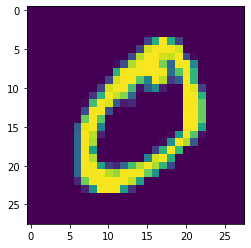

In [5]:
plt.imshow(X[0].reshape(28,28))

In [6]:
ohe = OneHotEncoder(categories="auto")
y_hot = ohe.fit_transform(y.reshape(-1,1))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [35]:
inp_layer = Input(shape=[28,28,1])
layer_1 = Conv2D(32,(3,3),activation="relu")(inp_layer)
layer_2 = MaxPool2D()(layer_1)
layer_3 = Conv2D(64,(3,3),activation="relu")(layer_2)
layer_4 = MaxPool2D()(layer_3)
drop = Dropout(.25)(layer_4)
layer_5 = Conv2D(128,(3,3),activation="relu")(drop)
layer_6 = MaxPool2D()(layer_5)

flatten  = Flatten()(layer_6)

d1 = Dense(200,activation="relu")(flatten)
d2 = Dense(50,activation="relu")(d1)
d3 = Dense(10,activation="softmax")(d2)


In [36]:
model = Model(inputs=[inp_layer],output=[d3])

c:\users\gippy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [38]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [39]:
history = model.fit(X_train,y_train,epochs=6,batch_size=200)

Epoch 1/6
5360/5360 [==============================] - 10s 2ms/step - loss: 3.5961 - acc: 0.3504
Epoch 2/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.7686 - acc: 0.7575A: 1s - loss: 0.8454 - ac
Epoch 3/6
5360/5360 [==============================] - 5s 1ms/step - loss: 0.4117 - acc: 0.8722
Epoch 4/6
5360/5360 [==============================] - ETA: 0s - loss: 0.2831 - acc: 0.915 - 5s 1ms/step - loss: 0.2806 - acc: 0.9162
Epoch 5/6
5360/5360 [==============================] - 5s 995us/step - loss: 0.2342 - acc: 0.9276
Epoch 6/6
5360/5360 [==============================] - 5s 994us/step - loss: 0.1816 - acc: 0.9448


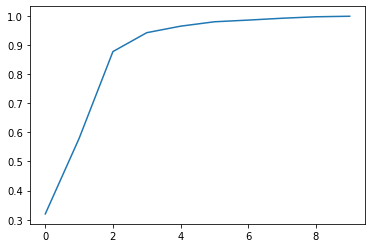

In [15]:
plt.plot(history.history["acc"])

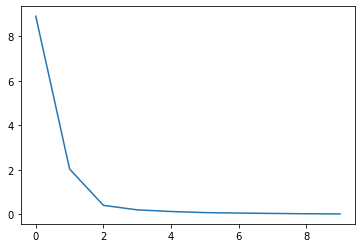

In [16]:
plt.plot(history.history["loss"])

In [40]:
model.evaluate(X_test,y_test)

2640/2640 [==============================] - 1s 489us/step


[0.13939931453628973, 0.9606060606060606]

[[4 9 2 5 3 6 0 7 8 1]]


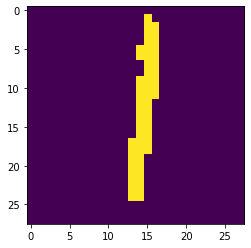

In [46]:
import cv2
one = cv2.imread("../datasets/nums/one.jpeg")
gray = cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)
small = cv2.resize(gray, (28, 28))
small = (small < 100).astype(int) * 255
print(np.argsort(model.predict(np.array([small.reshape(28,28,1)]))))
plt.imshow(small)